# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")
#libraries to load and manipulate data
import numpy as np
import pandas as pd
#libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
#library to split data
from sklearn.model_selection import train_test_split
#libraries to tune different models
from sklearn.model_selection import GridSearchCV
#libraries to get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
######## DECISION TREE ########
#libraries to build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
######## BAGGING AND RANDOM FOREST ########
#libraries to build model for prediction
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
######## BOOSTING ########
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
######## STACKING ########
from sklearn.ensemble import StackingClassifier

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
easyvisa = pd.read_csv('/content/drive/My Drive/PGDSBA/EasyVisa.csv')

Creating a copy of the data

In [5]:
data = easyvisa.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head() #displays first 5 rows of the dataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


In [ ]:
data.tail() #displays last 5 rows of the dataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


From head() and tail(), we see that the data was loaded properly.

In [ ]:
data.shape #gives (no. of rows, columns) in dataset

(25480, 12)

The given dataset has 25480 rows and 12 columns.

In [ ]:
data.info() #gives the datatype of each column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- The dataset has 3 numerical columns, `no_of_employees`, `yr_of_estab` and `prevailing_wage`.
- There are 9 columns of object datatype, `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position` and `case_status`.

#### Checking for missing values

In [ ]:
data.isnull().any() #checking for missing data

case_id                  False
continent                False
education_of_employee    False
has_job_experience       False
requires_job_training    False
no_of_employees          False
yr_of_estab              False
region_of_employment     False
prevailing_wage          False
unit_of_wage             False
full_time_position       False
case_status              False
dtype: bool

There are no missing values in the dataset.

#### Checking for duplicate data

In [ ]:
data.duplicated().sum() #checking for duplicate data

0

In [ ]:
data['case_id'].nunique() #checking for duplicate data as case_id is unique

25480

Case IDs are unique, and we see there are 25480 unique values.This implies there are no duplicates in the data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Basic analysis and Data cleaning

In [ ]:
data.describe().T #gives the statistical summary of data

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


- The average number of employees in a company is about 5667. We observe that the minumum number of employees is a negative number, which is to be treated.
- The average value of prevailing wage is 74455.81, the minimum being 2.13 and the maximum being 319210.27.

In [ ]:
#count no. of columns containing negative values for no_of_employees
data[data['no_of_employees']<1].shape

(33, 12)

There are 33 rows where number of employees is recorded as a negative value.
We shall convert these numbers to positive values.

In [6]:
data['no_of_employees'] = abs(data['no_of_employees'])

Deleting the case_id column as the values are unique.

In [7]:
data.drop(['case_id'], axis=1, inplace=True)

Checking the counts of each unique category in categorical data

In [ ]:
for feature in data.columns:
  if data[feature].dtype == 'object':
    print(data[feature].value_counts())
    print('-' * 40)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
----------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
----------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
----------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
----------------------------------------
Y    22773
N     2707
Name: full_time_position, dtype: int64
----------------------------------------
Certified

#### Univariate Analysis

In [32]:
# function to draw histogram and box plot
def plot_numerical_feature(data, attribute):
  plt.title('Histogram plot of ' + attribute)
  sns.histplot(data=data, x=attribute);
  plt.show()

  plt.title('Boxplot of ' + attribute)
  sns.boxplot(data=data, x=attribute);
  plt.show()

In [ ]:
# function to draw barplot for categorical data
def plot_categorical_feature(data, attribute):
  plt.title('Plot of categories in ' + attribute)
  plot = sns.countplot(data=data, x=attribute, palette='Accent', order=data[attribute].value_counts().index);
  for p in plot.patches:
    plot.annotate('{0:.0f}%'.format(p.get_height()/data[attribute].value_counts().sum() * 100), (p.get_x()+0.3, p.get_height()), ha='center') 
  plt.xticks(rotation=90)
  plt.show()

##### Analysis of categorical Features

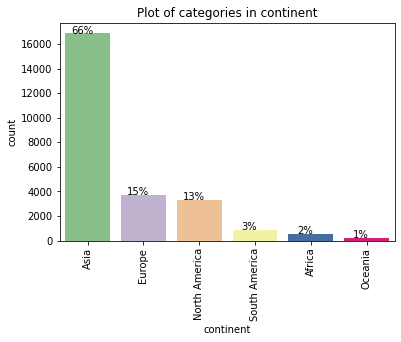

In [ ]:
plot_categorical_feature(data, 'continent')

- 66% of the applications are from Asia, followed by Europe(13%) and North America(13%).
- Number of applications from Oceania are the least(1%).

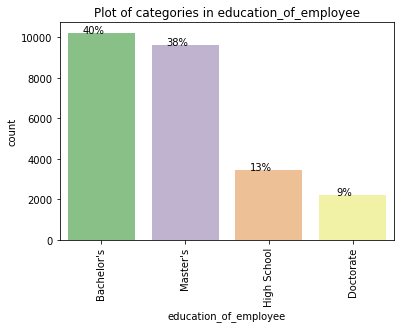

In [ ]:
plot_categorical_feature(data, 'education_of_employee')

- 40% of the applicants have Bachelor's degree, followed by 38% of applicants with Master's degree.
- Applicants with a Doctorate are the least(9%).

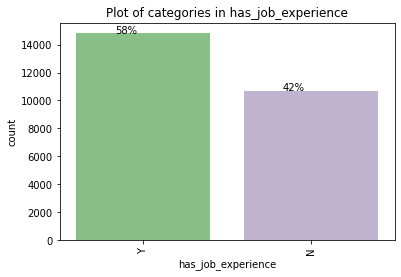

In [ ]:
plot_categorical_feature(data, 'has_job_experience')

- 58% of the applicants have job experience.

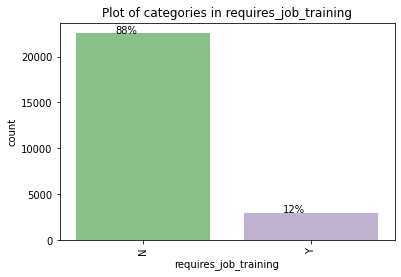

In [ ]:
plot_categorical_feature(data, 'requires_job_training')

- 88% of the applicants do not require job training.

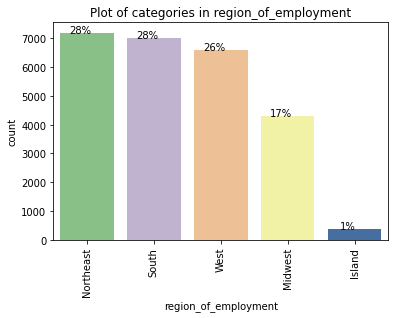

In [ ]:
plot_categorical_feature(data, 'region_of_employment')

- Northeast and South are the most intended region of employment for foreign worker's in the US(28%).
- This is followed by Western region(26%).
- Island is the least intended region of employment.

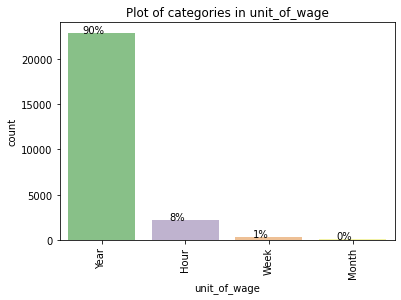

In [ ]:
plot_categorical_feature(data, 'unit_of_wage')

- 90% of the unit of prevailing wage is Year.
- There are very less number of applications with Month as the unit of prevailing wage.

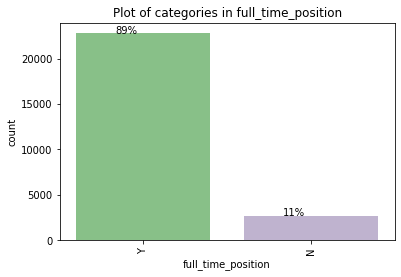

In [ ]:
plot_categorical_feature(data, 'full_time_position')

- 89% of the applications were for full-time position of work.

##### Analysis of numerical features

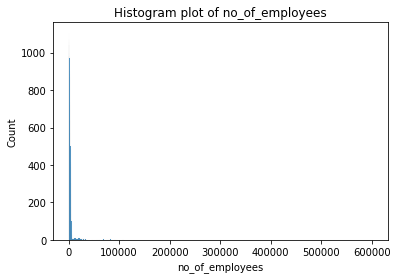

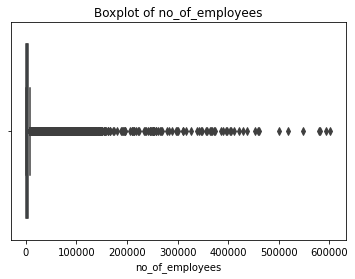

In [33]:
plot_numerical_feature(data, 'no_of_employees')

- The plot of `no_of_employees` is highly right skewed.
- We observe there are so many outliers. We will not treat the outliers as they are genuine values.

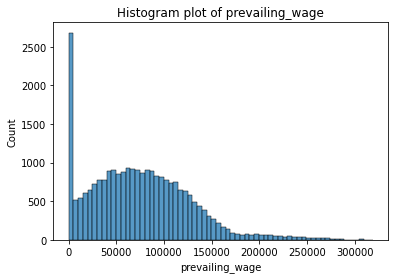

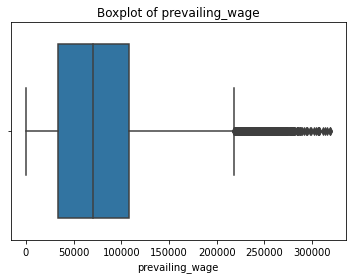

In [ ]:
plot_numerical_feature(data, 'prevailing_wage')

In [39]:
data[data['prevailing_wage']<100]['prevailing_wage'].count()

176

In [40]:
data['prevailing_wage'].median()

70308.20999999999

- The plot of `prevailing_wage` is right skewed with many outliers on the right side.
- The median value of `prevailing_wage` is 70308.2
- There are 176 applications with `prevailing_wage` less than 100.
- The data looks genuine, and we do not treat them as outliers.

#### Bivariate Analysis

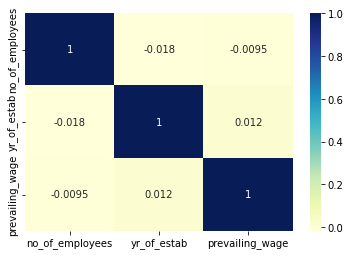

In [ ]:
sns.heatmap(data=data.corr(), annot=True, cmap='YlGnBu');
plt.show()

There is no correlation between the numerical features.

Analysing `region_of_employment` vs `education_of_employee`

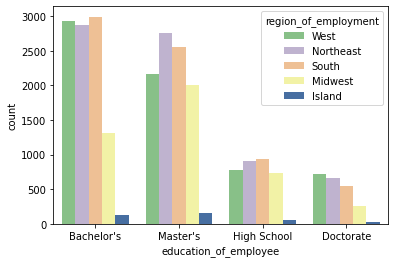

In [97]:
sns.countplot(data=data, x='education_of_employee', hue='region_of_employment', palette='Accent', order=data['education_of_employee'].value_counts().index);
plt.show()

- The count of applications with a bachelor's degree is the highest in South region, followed by West and Northeast.
- The count of applications with a master's degree is the highest in Northeast region, followed by South and West. 
- In the Midwest region, applications with master's degree are more in number.


Analysing `visa_status` vs `region_of_employment`

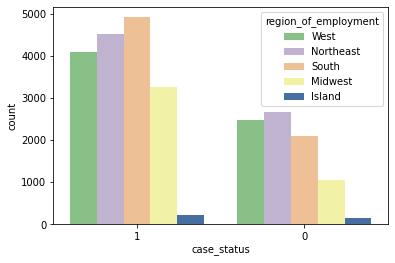

In [98]:
sns.countplot(data=data, x='case_status', hue='region_of_employment', palette='Accent', order=data['case_status'].value_counts().index);
plt.show()

- More number of visa is approved for applications from the South region, followed by Northeast and West regions.

Analysing `prevailing_wage` for different `region_of_employment`

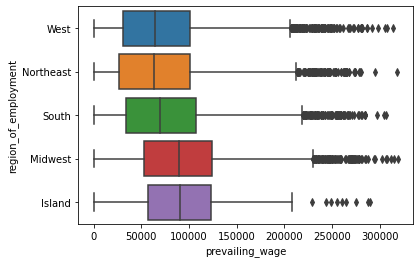

In [9]:
sns.boxplot(data=data, x='prevailing_wage', y='region_of_employment');
plt.show()

- Island region has the highest median `prevailing_wage` followed by Midwest region.
- Northeast region has the lowest median `prevailing_wage`.

Analysing `has_job_experience` vs `requires_job_training`

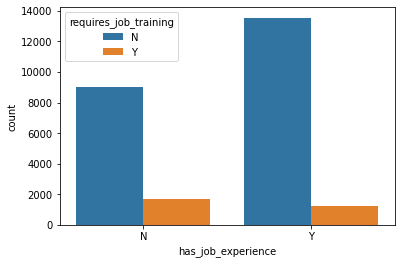

In [11]:
sns.countplot(data=data, x='has_job_experience', hue='requires_job_training');
plt.show()

- Most of the employees with job experience do not require job training.


**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Qn. 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

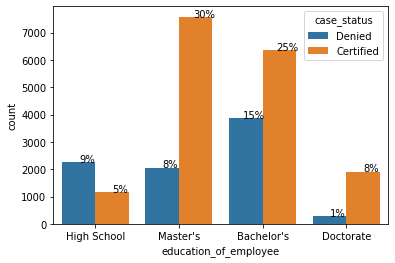

In [ ]:
plot = sns.countplot(data=data, x='education_of_employee', hue='case_status');
for p in plot.patches: 
  plot.annotate('{0:.0f}%'.format(p.get_height()/data['education_of_employee'].value_counts().sum() * 100), (p.get_x()+0.3, p.get_height()), ha='center')  
plt.show()

- Visa was certified for a higher proportion of applications with Master's(30%) and Doctorate(8%).
- Visa was approved for 25% of the applications with Bachelor's degree. 
- Visa denial outnumbered the approval for applications with High School level of education.

Qn. 2. How does the visa status vary across different continents? 

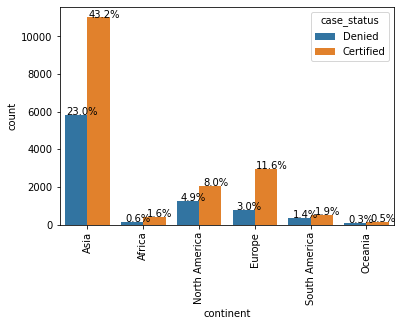

In [ ]:
plot = sns.countplot(data=data, x='continent', hue='case_status');
for p in plot.patches: 
  plot.annotate('{0:.1f}%'.format(p.get_height()/data['continent'].value_counts().sum() * 100), (p.get_x()+0.3, p.get_height()), ha='center')  
plt.xticks(rotation=90)
plt.show()

- Most of the applicants are from Asia, and 43% of the applications were approved for a visa. 23% of applications from Asia were denied a visa.
- This is followed by Europe with 11.6% approval.
- Oceania has the least number of visa applications, and it justifies the percentages on the plot, followed by Africa and South America.

Qn. 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

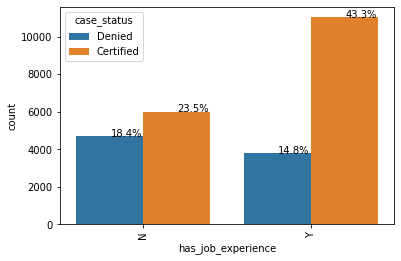

In [ ]:
plot = sns.countplot(data=data, x='has_job_experience', hue='case_status');
for p in plot.patches: 
  plot.annotate('{0:.1f}%'.format(p.get_height()/data['has_job_experience'].value_counts().sum() * 100), (p.get_x()+0.3, p.get_height()), ha='center')  
plt.xticks(rotation=90)
plt.show()

- 43.3% of the applicants with job experience got their visa approved.
- 23.5% of the applicants without job experience also got their visa approved.

Qn. 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

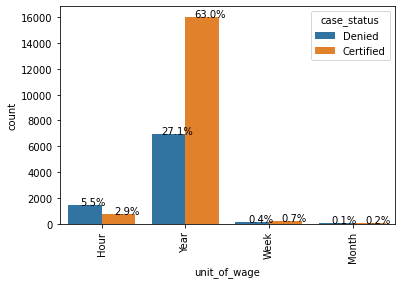

In [ ]:
plot = sns.countplot(data=data, x='unit_of_wage', hue='case_status');
for p in plot.patches: 
  plot.annotate('{0:.1f}%'.format(p.get_height()/data['unit_of_wage'].value_counts().sum() * 100), (p.get_x()+0.3, p.get_height()), ha='center')  
plt.xticks(rotation=90)
plt.show()

- Visa was approved for 63% of the applications with Year as the unit of prevailing wage.
- Visa denial outnumbered the approval for applications with Hour as the unit of prevailing wage.

Qn. 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

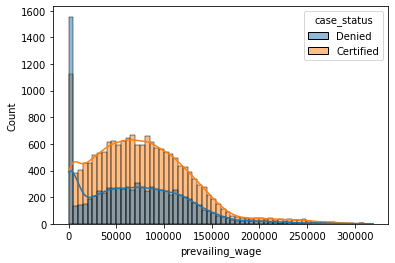

In [ ]:
plot = sns.histplot(data=data, x='prevailing_wage', hue='case_status', kde=True);
plt.show()

In [90]:
data[data['prevailing_wage']<15000]['case_status'].value_counts()

1    1919
0    1830
Name: case_status, dtype: int64

- Visa is more likely to be certified for applications with prevailing wage range of 15000 to 150000.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Missing value treatment

There are no missing values in the dataset.

#### Feature engineering


No feature engineeering is required for the given dataset.

#### Outlier detection and treatment

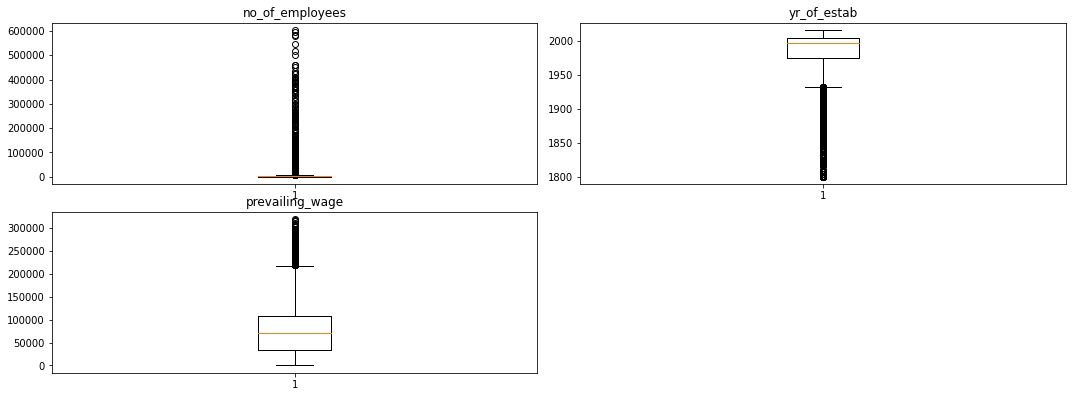

In [ ]:
num_col_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=[15,8])

for i, variable in enumerate(num_col_list):
  plt.subplot(3,2,i+1)
  plt.boxplot(data[variable], whis=1.5);
  plt.tight_layout()
  plt.title(variable)

The data looks genuine, we are not treating any outliers.

#### Preparing data for modelling

Converting values for case_status, 'Certified' = 1 and 'Denied' = 0

In [7]:
data['case_status'].unique()

array(['Denied', 'Certified'], dtype=object)

In [8]:
data.loc[data['case_status'] == 'Certified', 'case_status'] = 1
data.loc[data['case_status'] == 'Denied', 'case_status'] = 0

In [9]:
data['case_status'].unique()

array([0, 1], dtype=object)

In [10]:
# converting object datatype to int for easier manipulations
data['case_status'] = data['case_status'].astype(int)

In [11]:
data['case_status'].unique()

array([0, 1])

Segregating the independent and dependent variables

In [12]:
df = data.copy()

In [13]:
X = df.drop(['case_status'], axis=1) #independent variables
y = df['case_status'] #dependent variable

Applying one-hot encoding for the remaining categorical variables

In [14]:
X = pd.get_dummies(X, drop_first=True)

Splitting the data into train and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17836, 21) (7644, 21) (17836,) (7644,)


## EDA

- It is a good idea to explore the data once again after manipulating it.

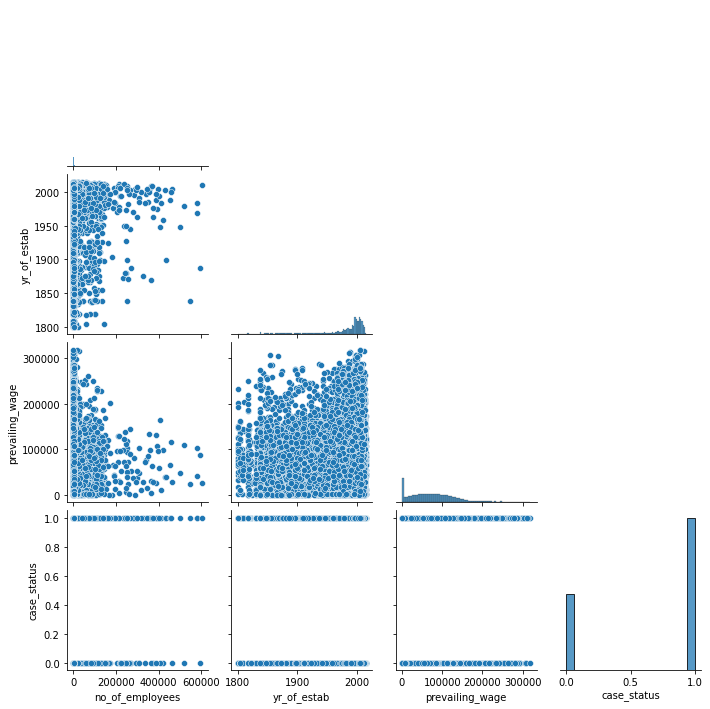

In [ ]:
sns.pairplot(data=df, corner=True);
plt.show()

We do not see any linear relationship between the attributes.

## Building the model

For the given problem, there are two situations where the model predictions can go wrong:

1. Model predicts that visa is certified, but visa is denied.
> In this case, a talented human resource is lost, which is a loss to the economy.

2. Model predicts that visa is denied, but visa gets approved.
> In this case, a talented US citizen capable of doing the job misses the opportunity, and a wrong employee lands the job.

Both the cases are important. Hence, we try to maximise the F1 score.
Greater F1 score implies higher chance of minimizing the False Positives and False Negatives.

In [17]:
#function to plot the confusion matrix
def draw_confusion_matrix(target, y_predicted):
  cm = confusion_matrix(target, y_predicted)
  labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

In [18]:
#function to predict data
def predict_data(model, predictors):
  predicted_value = model.predict(predictors)
  return (predicted_value)

In [19]:
#function to calculate accuracy, recall, precision and F1-scores for dataset
def evaluate_performance(actual_value, predicted_value):
  accuracy = accuracy_score(actual_value, predicted_value)
  recall = recall_score(actual_value, predicted_value)
  precision = precision_score(actual_value, predicted_value)
  F1_score = f1_score(actual_value, predicted_value)
  metrics = {'Accuracy' :round(accuracy,4),
             'Recall' : round(recall,4),
             'Precision' : round(precision,4),
             'F1-score' : round(F1_score,4)}
  return (metrics)

### Building default decision tree and analysing the model performance

In [ ]:
#create the default decision tree and fit the training data
dtree_default = DecisionTreeClassifier(random_state=1)
dtree_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#predict training data
y_train_pred_dtree_default = predict_data(dtree_default, X_train)

In [ ]:
#predict testing data
y_test_pred_dtree_default = predict_data(dtree_default, X_test)

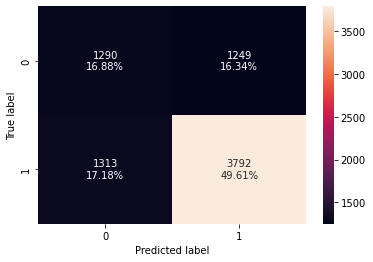

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_dtree_default)

In [149]:
#evaluate the performance of training and testing data
perf_train_dtree_default = evaluate_performance(y_train, y_train_pred_dtree_default)
perf_test_dtree_default = evaluate_performance(y_test, y_test_pred_dtree_default)
print(perf_train_dtree_default)
print(perf_test_dtree_default)

{'Accuracy': 1.0, 'Recall': 1.0, 'Precision': 1.0, 'F1-score': 1.0}
{'Accuracy': 0.6648, 'Recall': 0.7428, 'Precision': 0.7522, 'F1-score': 0.7475}


- The default decision tree has 100% accuracy for training data and 66.48% accuracy for testing data.
- This model is clearly overfitting the training data.

### Building decision tree with tuned hyperparameters and analysing the model performance

In [ ]:
dtree_tuned = DecisionTreeClassifier(random_state=1, class_weight='balanced')
parameters = {"max_depth": [5, 10, 15],
              "min_samples_leaf": [3, 5, 7],
              "max_leaf_nodes": [2, 5],
              "min_impurity_decrease": [0.0001, 0.001]
             }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
dtree_tuned = grid_obj.best_estimator_
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [ ]:
#predict training data
y_train_pred_dtree_tuned = predict_data(dtree_tuned, X_train)

In [ ]:
#predict testing data
y_test_pred_dtree_tuned = predict_data(dtree_tuned, X_test)

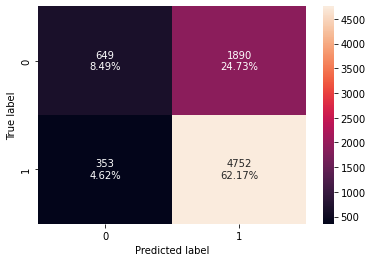

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_dtree_tuned)

In [150]:
#evaluate the performance of training and testing data
perf_train_dtree_tuned = evaluate_performance(y_train, y_train_pred_dtree_tuned)
perf_test_dtree_tuned = evaluate_performance(y_test, y_test_pred_dtree_tuned)
print(perf_train_dtree_tuned)
print(perf_test_dtree_tuned)

{'Accuracy': 0.7125, 'Recall': 0.9319, 'Precision': 0.7201, 'F1-score': 0.8124}
{'Accuracy': 0.7066, 'Recall': 0.9309, 'Precision': 0.7154, 'F1-score': 0.8091}


- The decision tree with tuned hyperparameters has performed very well on the training and testing data.
- From the accuracy values for training and testing data, we observe that thid model is not overfitting the training data.
- The F1 score too has increased to about 80%.

### Building bagging model and analysing the model performance

In [ ]:
bagging_default = BaggingClassifier(random_state=1)
bagging_default.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
#predict the training data
y_train_pred_bagging_default = bagging_default.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_bagging_default = bagging_default.predict(X_test)

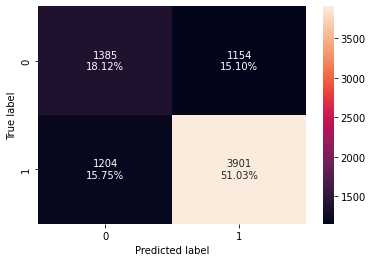

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_bagging_default)

In [152]:
#evaluate the performance of training and testing data
perf_train_bagging_default = evaluate_performance(y_train, y_train_pred_bagging_default)
perf_test_bagging_default = evaluate_performance(y_test, y_test_pred_bagging_default)
print(perf_train_bagging_default)
print(perf_test_bagging_default)

{'Accuracy': 0.9852, 'Recall': 0.986, 'Precision': 0.9918, 'F1-score': 0.9889}
{'Accuracy': 0.6915, 'Recall': 0.7642, 'Precision': 0.7717, 'F1-score': 0.7679}


- The default bagging classifier model has 98.5% accuracy for training data and 69% accuracy for testing data.
- This model is clearly overfitting the training data.

### Building bagging model with tuned hyperparameters and analysing the model performance

In [ ]:
bagging_tuned = BaggingClassifier(random_state=1)
parameters = {'n_estimators': np.arange(50, 110, 10),
              'max_samples' : np.arange(0.5, 1.0, 0.1),
              'max_features' : np.arange(0.5, 1.0, 0.1)
             }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
bagging_tuned = grid_obj.best_estimator_
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.6, n_estimators=90,
                  random_state=1)

In [ ]:
#predict the training data
y_train_pred_bagging_tuned = bagging_tuned.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_bagging_tuned = bagging_tuned.predict(X_test)

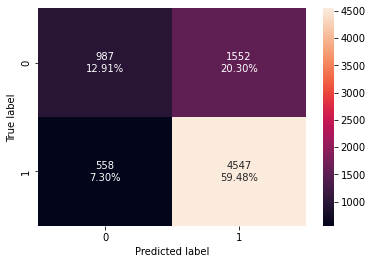

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_bagging_tuned)

In [153]:
#evaluate the performance of training and testing data
perf_train_bagging_tuned = evaluate_performance(y_train, y_train_pred_bagging_tuned)
perf_test_bagging_tuned = evaluate_performance(y_test, y_test_pred_bagging_tuned)
print(perf_train_bagging_tuned)
print(perf_test_bagging_tuned)

{'Accuracy': 0.9857, 'Recall': 0.9994, 'Precision': 0.9796, 'F1-score': 0.9894}
{'Accuracy': 0.724, 'Recall': 0.8907, 'Precision': 0.7455, 'F1-score': 0.8117}


- The tuned bagging classifier model has accuracy value similar to the default model for training data, and 72% accuracy for testing data.
- The tuned model too is clearly overfitting the training data.
- The F1 score of tuned model has slightly increased from 76%(default) to 81%.

### Building bagging model with logistic regression as base estimator and analysing the model performance

In [ ]:
bagging_lr = BaggingClassifier(random_state=1, base_estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000))
bagging_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [ ]:
#predict the training data
y_train_pred_bagging_lr = bagging_lr.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_bagging_lr = bagging_lr.predict(X_test)

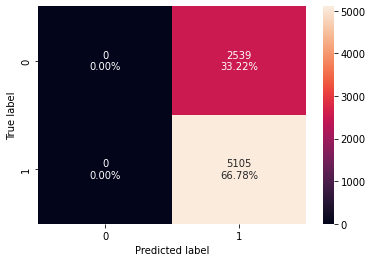

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_bagging_lr)

In [154]:
#evaluate the performance of training and testing data
perf_train_bagging_lr = evaluate_performance(y_train, y_train_pred_bagging_lr)
perf_test_bagging_lr = evaluate_performance(y_test, y_test_pred_bagging_lr)
print(perf_train_bagging_lr)
print(perf_test_bagging_lr)

{'Accuracy': 0.6679, 'Recall': 1.0, 'Precision': 0.6679, 'F1-score': 0.8009}
{'Accuracy': 0.6678, 'Recall': 1.0, 'Precision': 0.6678, 'F1-score': 0.8008}


- We observe that the bagging model built using logistic regression as the base estimator is performing well.
- The accuracy is 66.7% for both training data and testing data, which shows the model does not overfit the training data.
- We see perfect recall for both training and testing data, i.e the model could perfectly identify all cases of visa denial.
- The F1 score is 80%, which is slightly less than bagging model with tuned hyperparameters.

### Building random forest model and analysing the model performance

In [ ]:
rf_default = RandomForestClassifier(random_state=1)
rf_default.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#predict the training data
y_train_pred_rf_default = rf_default.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_rf_default = rf_default.predict(X_test)

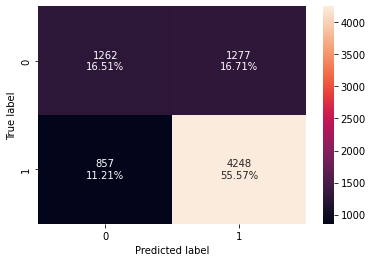

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_rf_default)

In [155]:
#evaluate the performance of training and testing data
perf_train_rf_default = evaluate_performance(y_train, y_train_pred_rf_default)
perf_test_rf_default = evaluate_performance(y_test, y_test_pred_rf_default)
print(perf_train_rf_default)
print(perf_test_rf_default)

{'Accuracy': 0.9999, 'Recall': 0.9999, 'Precision': 1.0, 'F1-score': 1.0}
{'Accuracy': 0.7208, 'Recall': 0.8321, 'Precision': 0.7689, 'F1-score': 0.7992}


- The default random forest classifier model has 99.99% accuracy for training data and 72% accuracy for testing data.
- This model is clearly overfitting the training data.

### Building random forest model with tuned hyperparameters and analysing the model performance

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1)
parameters = {'max_depth' : [5, 10, 15],
              'n_estimators': [150, 200, 250],
              'max_features' : np.arange(0.2, 0.7, 0.1),
              'max_samples' : np.arange(0.3, 0.7, 0.1)
             }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.3,
                       n_estimators=150, random_state=1)

In [ ]:
#predict the training data
y_train_pred_rf_tuned = rf_tuned.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_rf_tuned = rf_tuned.predict(X_test)

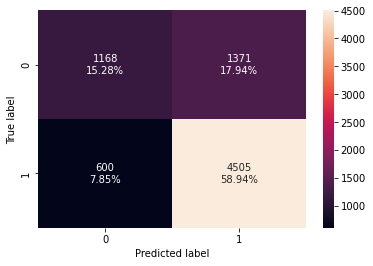

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_rf_tuned)

In [156]:
#evaluate the performance of training and testing data
perf_train_rf_tuned = evaluate_performance(y_train, y_train_pred_rf_tuned)
perf_test_rf_tuned = evaluate_performance(y_test, y_test_pred_rf_tuned)
print(perf_train_rf_tuned)
print(perf_test_rf_tuned)

{'Accuracy': 0.7714, 'Recall': 0.9027, 'Precision': 0.7865, 'F1-score': 0.8406}
{'Accuracy': 0.7422, 'Recall': 0.8825, 'Precision': 0.7667, 'F1-score': 0.8205}


- The random forest classifier with tuned hyperparameters has performed very well on the training and testing data.
- From the accuracy values for training(77%) and testing data(74%), we observe that the model is not overfitting the training data.
- The F1 score too has increased to 82%.

### Building random forest model with class weights and tuned hyperparameters; and analysing the model performance

In [ ]:
df['case_status'].value_counts(normalize=True)

1   0.66790
0   0.33210
Name: case_status, dtype: float64

- We see that the classes are imbalanced, 66% are certified and 33% are denied a visa. 
- We add the `class_weight` hyperparameter, tune the random forest and evaluate the performance.
- We choose `class_weight` of [{0:0.66,1:0.33}], as it is the original imbalance in the data.

In [ ]:
rf_class_wt = RandomForestClassifier(random_state=1)
parameters = {'class_weight' : [{0:0.66,1:0.33}],
              'max_depth' : [5, 10, 15],
              'n_estimators': [150, 200, 250],
              'max_features' : np.arange(0.2, 0.7, 0.1),
              'max_samples' : np.arange(0.3, 0.7, 0.1)
             }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(rf_class_wt, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
rf_class_wt = grid_obj.best_estimator_
rf_class_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.66, 1: 0.33}, max_depth=15,
                       max_features=0.2, max_samples=0.3, n_estimators=150,
                       random_state=1)

In [ ]:
#predict the training data
y_train_pred_rf_class_wt = rf_class_wt.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_rf_class_wt = rf_class_wt.predict(X_test)

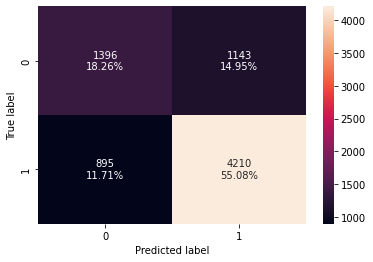

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_rf_class_wt)

In [157]:
#evaluate the performance of training and testing data
perf_train_rf_class_wt = evaluate_performance(y_train, y_train_pred_rf_class_wt)
perf_test_rf_class_wt = evaluate_performance(y_test, y_test_pred_rf_class_wt)
print(perf_train_rf_class_wt)
print(perf_test_rf_class_wt)

{'Accuracy': 0.8156, 'Recall': 0.8779, 'Precision': 0.8507, 'F1-score': 0.8641}
{'Accuracy': 0.7334, 'Recall': 0.8247, 'Precision': 0.7865, 'F1-score': 0.8051}


- The performance of random forest classifier with class weights and tuned hyperparameters looks good.
- From the accuracy values for training(81%) and testing data(73%), we observe that the model is slightly overfitting the training data.
- The F1 score has dropped to 80%.

### Building AdaBoost model and analysing the model performance

In [ ]:
abc_default = AdaBoostClassifier(random_state=1)
abc_default.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#predict the training data
y_train_pred_abc_default = abc_default.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_abc_default = abc_default.predict(X_test)

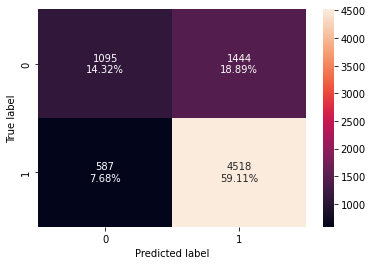

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_abc_default)

In [158]:
#evaluate the performance of training and testing data
perf_train_abc_default = evaluate_performance(y_train, y_train_pred_abc_default)
perf_test_abc_default = evaluate_performance(y_test, y_test_pred_abc_default)
print(perf_train_abc_default)
print(perf_test_abc_default)

{'Accuracy': 0.7382, 'Recall': 0.8872, 'Precision': 0.7607, 'F1-score': 0.8191}
{'Accuracy': 0.7343, 'Recall': 0.885, 'Precision': 0.7578, 'F1-score': 0.8165}


- The default adaboost classifier model has performed well on both training and testing data. The model is not overfitting the training data.
- The accuracy is about 73%, and F1 score is about 81%.
- We shall check if the F1 score improves on tuning the hyperparameters.

### Building AdaBoost model with tuned hyperparameters and analysing the model performance

In [ ]:
abc_tuned = AdaBoostClassifier(random_state=1)
parameters = {'base_estimator' : [DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                                  DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                                  DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
              'n_estimators': np.arange(60, 110, 10),
              'learning_rate' : np.arange(0.1, 1, 0.1)
             }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
abc_tuned = grid_obj.best_estimator_
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
#predict the training data
y_train_pred_abc_tuned = abc_tuned.predict(X_train)

In [ ]:
#predict the testing data
y_test_pred_abc_tuned = abc_tuned.predict(X_test)

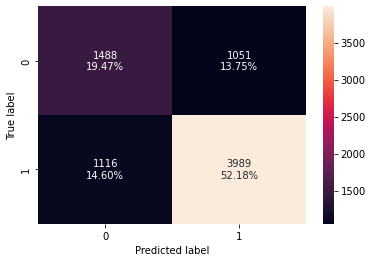

In [ ]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_abc_tuned)

In [159]:
#evaluate the performance of training and testing data
perf_train_abc_tuned = evaluate_performance(y_train, y_train_pred_abc_tuned)
perf_test_abc_tuned = evaluate_performance(y_test, y_test_pred_abc_tuned)
print(perf_train_abc_tuned)
print(perf_test_abc_tuned)

{'Accuracy': 0.719, 'Recall': 0.7812, 'Precision': 0.7946, 'F1-score': 0.7879}
{'Accuracy': 0.7165, 'Recall': 0.7814, 'Precision': 0.7915, 'F1-score': 0.7864}


- The adaboost classifier model with tuned hyperparameters has also performed well on both training and testing data. The model is not overfitting the training data.
- The accuracy has dropped to 71%.
- F1 score too has dropped to 78%.

### Building Gradient Boosting model and analysing the model performance

In [101]:
gb_default = GradientBoostingClassifier(random_state=1)
gb_default.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [102]:
#predict the training data
y_train_pred_gb_default = gb_default.predict(X_train)

In [103]:
#predict the testing data
y_test_pred_gb_default = gb_default.predict(X_test)

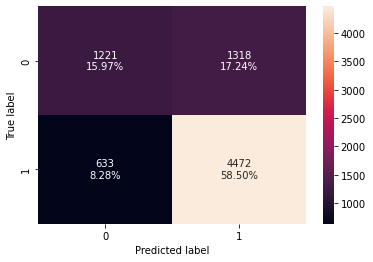

In [104]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_gb_default)

In [160]:
#evaluate the performance of training and testing data
perf_train_gb_default = evaluate_performance(y_train, y_train_pred_gb_default)
perf_test_gb_default = evaluate_performance(y_test, y_test_pred_gb_default)
print(perf_train_gb_default)
print(perf_test_gb_default)

{'Accuracy': 0.7588, 'Recall': 0.8837, 'Precision': 0.783, 'F1-score': 0.8303}
{'Accuracy': 0.7448, 'Recall': 0.876, 'Precision': 0.7724, 'F1-score': 0.8209}


- The default gradient boosting classifier model has performed well on both training and testing data. The model is not overfitting the training data.
- The accuracy is 75%, and F1 score is 82%, slightly better than the default adaboost classifier.
- We shall check if the F1 score improves on tuning the hyperparameters.

### Building Gradient Boosting model with tuned hyperparameters and analysing the model performance

In [26]:
gb_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
parameters = {'n_estimators': [200, 250],
              'subsample' : [0.8, 0.9],
              'max_features' : [0.8, 0.9]
             }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
gb_tuned = grid_obj.best_estimator_
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

In [27]:
#predict the training data
y_train_pred_gb_tuned = gb_tuned.predict(X_train)

In [28]:
#predict the testing data
y_test_pred_gb_tuned = gb_tuned.predict(X_test)

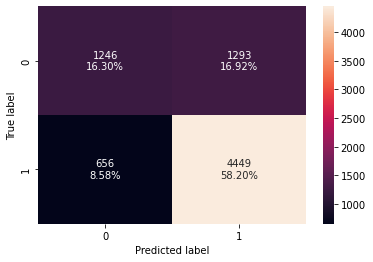

In [29]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_gb_tuned)

In [30]:
#evaluate the performance of training and testing data
perf_train_gb_tuned = evaluate_performance(y_train, y_train_pred_gb_tuned)
perf_test_gb_tuned = evaluate_performance(y_test, y_test_pred_gb_tuned)
print(perf_train_gb_tuned)
print(perf_test_gb_tuned)

{'Accuracy': 0.7648, 'Recall': 0.8841, 'Precision': 0.7892, 'F1-score': 0.8339}
{'Accuracy': 0.745, 'Recall': 0.8715, 'Precision': 0.7748, 'F1-score': 0.8203}


- The gradient boosting classifier model with tuned hyperparameters has performed well on both training and testing data. The model is not overfitting the training data.
- The F1 score is 82%, almost similar to the default gradient boosting classifier model.

### Building XGBoost model and analysing the model performance

In [108]:
xgb_default = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_default.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [109]:
#predict the training data
y_train_pred_xgb_default = xgb_default.predict(X_train)

In [110]:
#predict the testing data
y_test_pred_xgb_default = xgb_default.predict(X_test)

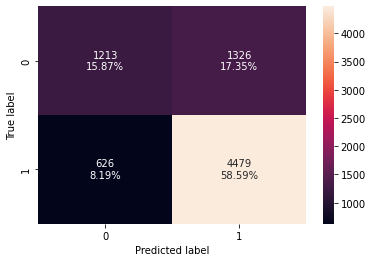

In [111]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_xgb_default)

In [166]:
#evaluate the performance of training and testing data
perf_train_xgb_default = evaluate_performance(y_train, y_train_pred_xgb_default)
perf_test_xgb_default = evaluate_performance(y_test, y_test_pred_xgb_default)
print(perf_train_xgb_default)
print(perf_test_xgb_default)

{'Accuracy': 0.7563, 'Recall': 0.8836, 'Precision': 0.7805, 'F1-score': 0.8289}
{'Accuracy': 0.7446, 'Recall': 0.8774, 'Precision': 0.7716, 'F1-score': 0.8211}


- The default XGB classifier model has performed well on both training and testing data. The model is not overfitting the training data.
- The F1 score is 82%, similar to the gradient boosting classifier model with tuned hyperparameters.
- We shall check if the F1 score improves on tuning the hyperparameters.

### Building XGBoost model with tuned hyperparameters and analysing the model performance

In [20]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')
parameters = {    "n_estimators": [150, 200],
                  "scale_pos_weight": [1, 2],
                  "subsample": [0.8, 0.9],
                  "learning_rate": [0.1, 0.2],
                  "gamma": [3, 5],
                  "colsample_bytree": [0.8, 0.9],
                  "colsample_bylevel": [0.8, 0.9],
             }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
xgb_tuned = grid_obj.best_estimator_
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.8, colsample_bytree=0.8,
              eval_metric='logloss', gamma=5, n_estimators=150, random_state=1,
              subsample=0.9)

In [21]:
#predict the training data
y_train_pred_xgb_tuned = xgb_tuned.predict(X_train)

In [22]:
#predict the testing data
y_test_pred_xgb_tuned = xgb_tuned.predict(X_test)

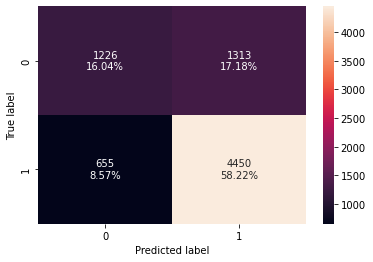

In [23]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_xgb_tuned)

In [24]:
#evaluate the performance of training and testing data
perf_train_xgb_tuned = evaluate_performance(y_train, y_train_pred_xgb_tuned)
perf_test_xgb_tuned = evaluate_performance(y_test, y_test_pred_xgb_tuned)
print(perf_train_xgb_tuned)
print(perf_test_xgb_tuned)

{'Accuracy': 0.7567, 'Recall': 0.8794, 'Precision': 0.7831, 'F1-score': 0.8284}
{'Accuracy': 0.7425, 'Recall': 0.8717, 'Precision': 0.7722, 'F1-score': 0.8189}


- The XGB classifier model with tuned hyperparameters has performed well on both training and testing data. The model is not overfitting the training data.
- The F1 score is 82%, similar to the default XGB classifier model.

### Building Stacking classifier and analysing the model performance

In [141]:
estimators=[('Random Forest', rf_tuned), ('AdaBoost', abc_default), 
           ('Gradient Boosting', gb_tuned)]
final_estimator = xgb_tuned

In [142]:
stacking_classifier=StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features=0.2,
                                                       max_samples=0.3,
                                                       n_estimators=150,
                                                       random_state=1)),
                               ('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1))],
                   final_estimator=XGBClassifier(cols

In [143]:
#predict the training data
y_train_pred_sc = stacking_classifier.predict(X_train)

In [144]:
#predict the testing data
y_test_pred_sc = stacking_classifier.predict(X_test)

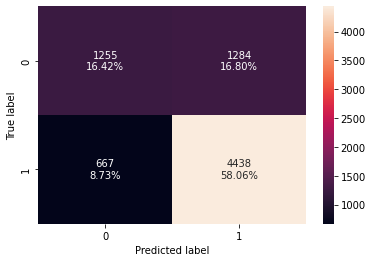

In [145]:
#draw confusion matrix for testing data
draw_confusion_matrix(y_test, y_test_pred_sc)

In [168]:
#evaluate the performance of training and testing data
perf_train_sc = evaluate_performance(y_train, y_train_pred_sc)
perf_test_sc = evaluate_performance(y_test, y_test_pred_sc)
print(perf_train_sc)
print(perf_test_sc)

{'Accuracy': 0.7706, 'Recall': 0.8846, 'Precision': 0.795, 'F1-score': 0.8374}
{'Accuracy': 0.7448, 'Recall': 0.8693, 'Precision': 0.7756, 'F1-score': 0.8198}


- The Stacking classifier model has performed quite well on both training and testing data. The model is not overfitting the training data.
- The F1 score is 82%, similar to the XGB classifier model.

## Model Performance Comparison and Conclusions

In [193]:
compare_models_train_metrics = [perf_train_dtree_default, perf_train_dtree_tuned, perf_train_bagging_default, perf_train_bagging_tuned,
     perf_train_bagging_lr, perf_train_rf_default, perf_train_rf_tuned, perf_train_rf_class_wt,
     perf_train_abc_default, perf_train_abc_tuned, perf_train_gb_default, perf_train_gb_tuned,
     perf_train_xgb_default, perf_train_xgb_tuned, perf_train_sc]
models_list = ['dtree_default', 'dtree_tuned', 'bagging_default', 'bagging_tuned',
     'bagging_lr', 'rf_default', 'rf_tuned', 'rf_class_wt', 'abc_default',
     'abc_tuned', 'gb_default', 'gb_tuned', 'xgb_default', 'xgb_tuned', 'sc']
idx = pd.Index(models_list)
train_df = pd.DataFrame(compare_models_train_metrics, index=idx)
train_df.sort_values(by=['F1-score'], ascending=False)

,Accuracy,Recall,Precision,F1-score
dtree_default,1.00000,1.00000,1.00000,1.00000
rf_default,0.99990,0.99990,1.00000,1.00000
bagging_tuned,0.98570,0.99940,0.97960,0.98940
bagging_default,0.98520,0.98600,0.99180,0.98890
rf_class_wt,0.81560,0.87790,0.85070,0.86410
rf_tuned,0.77140,0.90270,0.78650,0.84060
sc,0.77060,0.88460,0.79500,0.83740
gb_tuned,0.76400,0.88260,0.78910,0.83320
gb_default,0.75880,0.88370,0.78300,0.83030
xgb_default,0.75630,0.88360,0.78050,0.82890


In [194]:
compare_models_test_metrics = [perf_test_dtree_default, perf_test_dtree_tuned, 
                               perf_test_bagging_default, perf_test_bagging_tuned,
                               perf_test_bagging_lr, perf_test_rf_default,
                               perf_test_rf_tuned, perf_test_rf_class_wt,
                               perf_test_abc_default, perf_test_abc_tuned, 
                               perf_test_gb_default, perf_test_gb_tuned,
                               perf_test_xgb_default, perf_test_xgb_tuned, perf_test_sc]
models_list = ['dtree_default', 'dtree_tuned', 'bagging_default', 'bagging_tuned',
     'bagging_lr', 'rf_default', 'rf_tuned', 'rf_class_wt', 'abc_default',
     'abc_tuned', 'gb_default', 'gb_tuned', 'xgb_default', 'xgb_tuned', 'sc']
idx = pd.Index(models_list)
test_df = pd.DataFrame(compare_models_test_metrics, index=idx)
test_df.sort_values(by=['F1-score'], ascending=False)

,Accuracy,Recall,Precision,F1-score
xgb_default,0.74460,0.87740,0.77160,0.82110
gb_default,0.74480,0.87600,0.77240,0.82090
rf_tuned,0.74220,0.88250,0.76670,0.82050
sc,0.74480,0.86930,0.77560,0.81980
gb_tuned,0.74350,0.87130,0.77330,0.81940
xgb_tuned,0.74250,0.87170,0.77220,0.81890
abc_default,0.73430,0.88500,0.75780,0.81650
bagging_tuned,0.72400,0.89070,0.74550,0.81170
dtree_tuned,0.70660,0.93090,0.71540,0.80910
rf_class_wt,0.73340,0.82470,0.78650,0.80510


Plotting feature importance

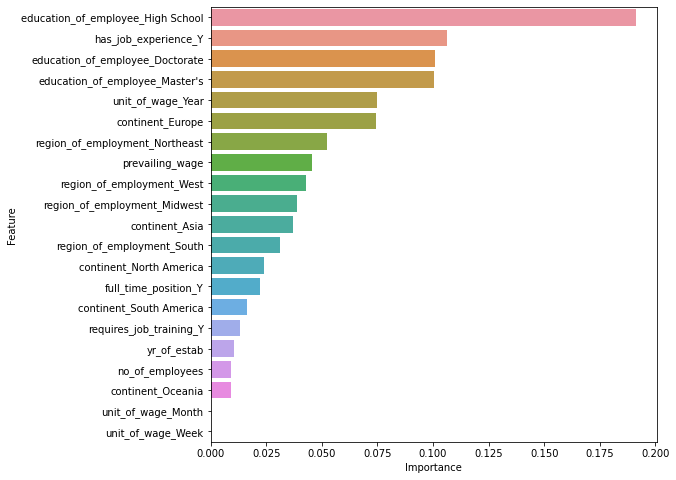

In [25]:
#plotting the importance of various features for xgb_tuned model
imp_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": xgb_tuned.feature_importances_})
plt.figure(figsize=(8, 8))
sns.barplot(x=imp_df['Importance'], y=X_train.columns, order=imp_df.sort_values('Importance', ascending=False).Feature)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

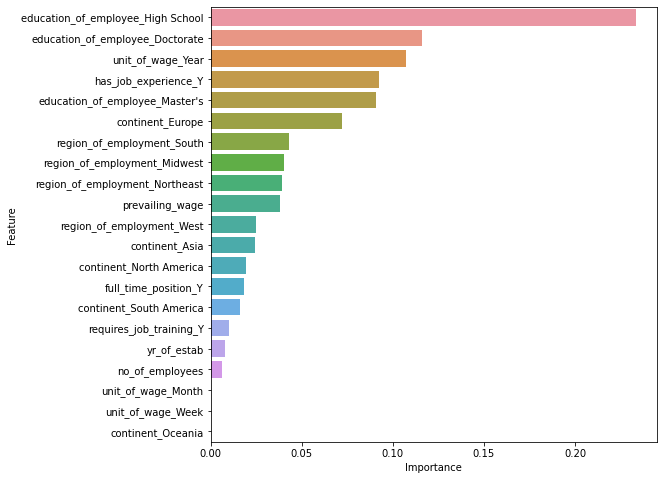

In [195]:
#plotting the importance of various features for xgb_default model
imp_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": xgb_default.feature_importances_})
plt.figure(figsize=(8, 8))
sns.barplot(x=imp_df['Importance'], y=X_train.columns, order=imp_df.sort_values('Importance', ascending=False).Feature)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

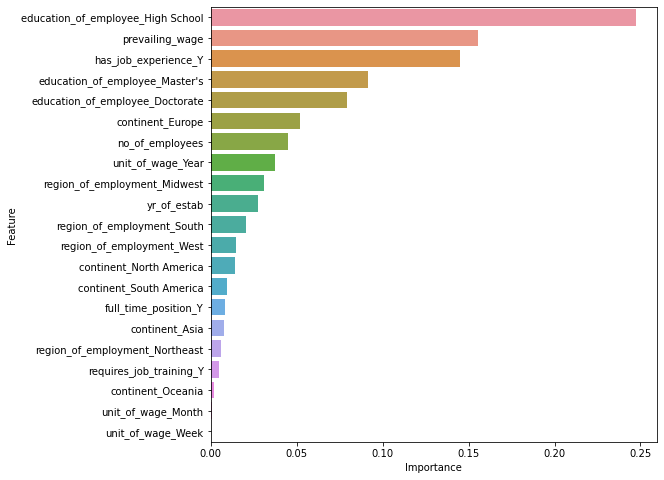

In [31]:
#plotting the importance of various features for gb_tuned model
imp_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": gb_tuned.feature_importances_})
plt.figure(figsize=(8, 8))
sns.barplot(x=imp_df['Importance'], y=X_train.columns, order=imp_df.sort_values('Importance', ascending=False).Feature)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

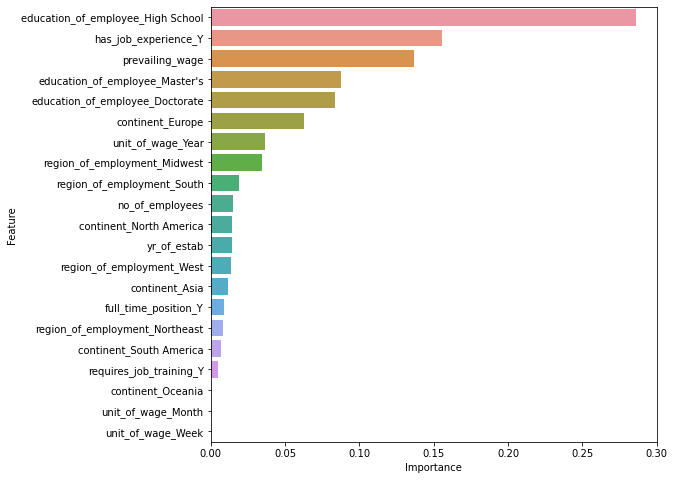

In [196]:
#plotting the importance of various features for gb_default model
imp_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": gb_default.feature_importances_})
plt.figure(figsize=(8, 8))
sns.barplot(x=imp_df['Importance'], y=X_train.columns, order=imp_df.sort_values('Importance', ascending=False).Feature)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

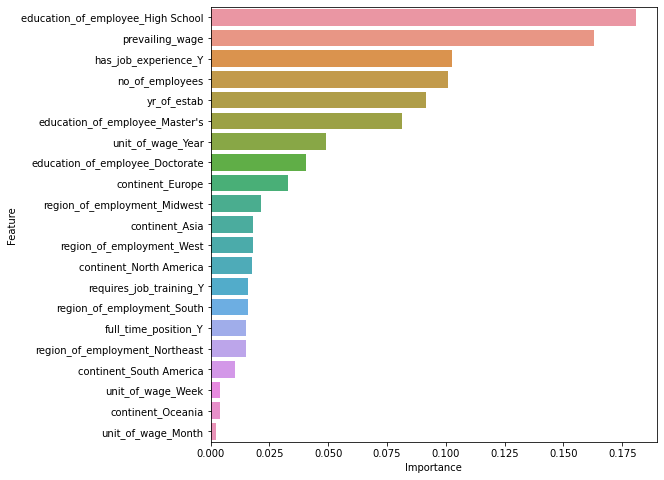

In [199]:
#plotting the importance of various features for rf_tuned model
imp_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": rf_tuned.feature_importances_})
plt.figure(figsize=(8, 8))
sns.barplot(x=imp_df['Importance'], y=X_train.columns, order=imp_df.sort_values('Importance', ascending=False).Feature)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


- The tuned XGB model is the best model here. It has high F1 score of 82%.
- The accuracy of the model on training and testing data is about 75%, which implies that the model does not overfit the training data.
- Default XGB, Gradient boosting and stacking classifier models are also performing well.
- We observe that high school education is the most important feature in determining whether visa is certified or not, followed by job experience.

## Actionable Insights and Recommendations

**Notable insights drawn on using our model to predict case status of profile based on the important features**

- Applications with South as the foreign worker's intended region of employment in the US have a higher chance of visa approval.
- Applicants with Master's or Doctorate degree have a higher chance of visa approval.
- Applicants from Asia have higher chances of getting certified for visa.
- Having job experience also plays an important role in visa approval.
- Chances of visa approval is higher for applications with Year as the unit of prevailing wage, and prevailing wage in the range of 15000 to 150000.
- Based on our analysis, we observe that the odds of getting visa approved decreases if the applicant's highest education is high school.
- Applications with Year as the unit of prevailing wage have higher chances of visa denial.


**Recommendations**

- The firm can search for candidate profiles strictly based on the job requirement, so that time and money are invested on the right employee.
- The firm can partner with organizations providing learning assistance and certification, making more people in the US become good fit for the job and improving their chances of visa approval.
- Attractive discounts can be offered for certification courses.
- The firm can invest in advertising their services, after a proper analysis of the market.
- The firm can further analyse the organizations that utilize their services, and partner with them to process job certification.
- The firm can target people with good education background and work experience, as their chances of visa approval is high.